In [31]:

import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
from scipy.integrate import quad
import seaborn as sns
import matplotlib.colors as colors
from matplotlib import rcParams
from scipy.interpolate import InterpolatedUnivariateSpline
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})


π = np.pi
G = 4.4959e-15            #in units of M☉^-1 pc^3 yr^-2
c = 0.3068                #in units of pc yr^-1
ρ_eq = 3.1812e3           #in units of M☉ pc^-3 with ρ_eq=2.15368e-16 kg m^-3
t = 13.78e9               #in units of yrs corresponding to t_0=13.78Gyr
yr = 3.154e7              # in units of seconds
pc = 3.0857e16            # in meters
yr = 3.154e7              # in units of seconds
t_eq = 1.59246e12/yr      # in units of seconds
ρ_m  = 4e19                #ρ_m=4e19 M☉ Gpc^-3
t_m = 13.78e9             #in units of yr 
σ_eq = 0.005



m_1 = 7       #in units of M☉
m_2 = 9      #in units of M☉



y_1 = np.log(m_1)
y_2 = np.log(m_2)
dy = (y_2-y_1)


y_list = np.zeros(11)

for i in range(len(y_list)):
    y_list[i] = (y_1 + (i*dy))
    

M_1_list = np.zeros(len(y_list))
M_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    M_1_list[i] = (np.ceil(np.exp(y)))
    M_2_list[i] = (np.ceil(np.exp(y)))
    

            
m_1_list = [int(M_1) for M_1 in M_1_list]
m_2_list = [int(M_2) for M_2 in M_2_list]

    
Δ_1_list = np.zeros(len(y_list))
Δ_2_list = np.zeros(len(y_list))

for i, y in enumerate(y_list):
    Δ_1_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy)
    Δ_2_list[i] = np.exp(y + 0.5*dy) - np.exp(y - 0.5*dy) 

    
print("m_1 =", m_1_list, "M☉")
print('\v')
print("Δ_1 =", Δ_1_list)




m_min = 5     #in units of M☉
m_max = 100   # in units of M☉

X_min = 1e-15
X_max = 1e5


m_1 = m_1_list[-1] 
m_2 = m_2_list[0]
Δ_1 = Δ_1_list[-1]
Δ_2 = Δ_2_list[0]
X = 1e-10

file = np.load('tm_ofj0_PWRhalo_1.npz')
m = file['arr_0']
b = file['arr_1']
a_i_ref =  file['arr_2']
ji_ref_list = file['arr_3']
tm_ref_list = file['arr_4']


m_1 = [7, 10, 12, 15, 20, 25, 32, 41, 53, 68, 87] M☉

Δ_1 = [ 1.76383421  2.26778684  2.91572593  3.74879049  4.81987348  6.19698019
  7.96754596 10.24398767 13.17084129 16.9339388  21.77220702]


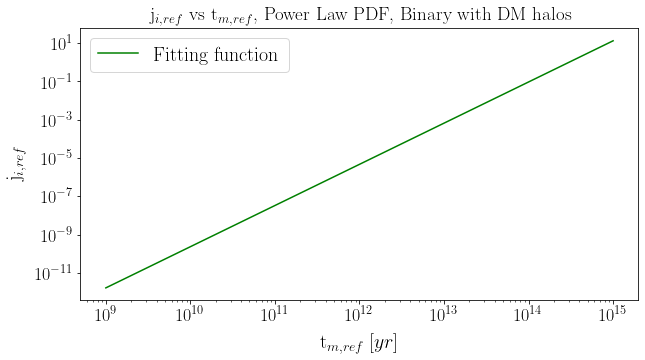

In [32]:
# check of the j_i values using fitting and Interpolation function. 

def ji_fitting_function(m_1,m_2,Δ_1,Δ_2, X, tm):
    beta = 0.75
    gamma  =  0.65
    delta = -0.89
    a_i_ref =  file['arr_2']   # in units of pc
    m1_ref = 1      # in units of solar mass.
    m2_ref = 1e-3   # in units of solar mass.

    def f_(m):
        return f*P(m)

    def f_b(m_1,m_2):
        return  f_(m_1)+f_(m_2)

    def λ(m_1, m_2, Δ_1, Δ_2, X): # λ_0
        return  X/(f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2))

    def PDF(m):
        return (P(m)/m)


    I = quad(PDF, m_min, m_max)             # Taking limits of the PBH mass from m_min M☉ to m_max M☉ instead of 
                                         # 0 to infinity.

    n_T = f * ρ_eq * I[0]                #n_T=f*ρ_eq∫(P(m)/m)*dm 

    def x̄(m_1,m_2,Δ_1,Δ_2):
        return (((3 * (m_1 + m_2))/(8 * π * ρ_eq * f_b(m_1,m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))



    def a_initial(m_1, m_2, Δ_1, Δ_2, X):  # for x = x_bar 
            return (0.0965*λ(m_1,m_2,Δ_1,Δ_2, X) + 0.0165*(λ(m_1,m_2,Δ_1,Δ_2, X)**2)) * x̄(m_1,m_2,Δ_1,Δ_2) * (X**(1/3))


    def C(m_1,m_2,Δ_1,Δ_2, X):
            return ((a_initial(m_1,m_2,Δ_1,Δ_2, X)/a_i_ref)**(beta)) * ((m_1/ m1_ref)**(gamma)) * ((m_2/m2_ref)**(delta))


    m = file['arr_0'] 
    b = file['arr_1'] 
     
    return (10**(-b/m))   * (tm**(1/m))   # t_m = (j_i**m) * (10**b)





                
tm_list = (np.geomspace(1e9, 1e15, 30)).tolist()
ji_fittingfunction_list = np.zeros(len(tm_list))



for i, tm in enumerate(tm_list):
    f_pbh = 7.94e-4
    f = 0.85 * f_pbh
    def P(m): #Powerlaw PBH mass distribution
        α = 1.6
        M = 5     #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_min = 100 M☉ .
        return ((α-1)/M) * ((m/M)**(-α))

    ji_fittingfunction_list[i] = ji_fitting_function(m_1,m_2,Δ_1,Δ_2, X, tm)
    

    
    
    
plt.figure(figsize = (10, 5))
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.loglog(tm_list, ji_fittingfunction_list, 'g' )

#plt.text(1e12, 1e-10, "$m_{i} = 87 \: \mathrm{M_{\odot}}$", size = 20)
#plt.text(1e12, 1e-13, "$m_{j} = 7 \: \mathrm{M_{\odot}}$", size = 20)
#plt.text(1e12, 1e-16, "$X = 10^{-10} $", size = 20)


plt.legend([ "Fitting function"], loc = 'upper left', fontsize = 20)
plt.xlabel('t$_{m,ref}$$\: [yr]$', fontsize = 20, labelpad = 9)
plt.ylabel('j$_{i,ref}$', fontsize = 20, labelpad = 9)
plt.title('j$_{i,ref}$ vs t$_{m,ref}$, Power Law PDF, Binary with DM halos', fontsize = 19, pad = 9)
plt.show()

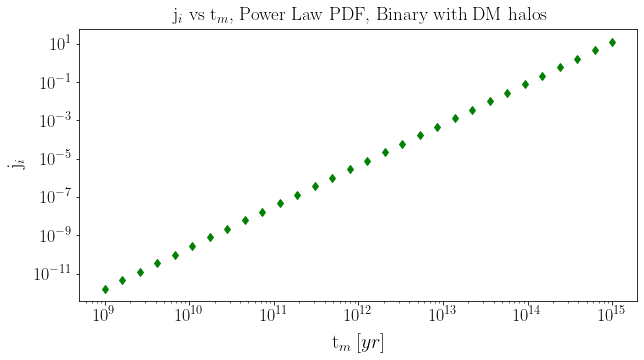

In [41]:
# check of the j_i values using fitting and Interpolation function. 

def ji_(m_1, m_2, Δ_1, Δ_2, X, tm):
    beta = 0.75
    gamma  =  0.65
    delta = -0.89
    a_i_ref =  file['arr_2']   # in units of pc
    m1_ref = 1      # in units of solar mass.
    m2_ref = 1e-3   # in units of solar mass.

    def f_(m):
        return f*P(m)

    def f_b(m_1,m_2):
        return  f_(m_1)+f_(m_2)

    def λ(m_1, m_2, Δ_1, Δ_2, X): # λ_0
        return  X/(f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2))

    def PDF(m):
        return (P(m)/m)


    I = quad(PDF, m_min, m_max)             # Taking limits of the PBH mass from m_min M☉ to m_max M☉ instead of 
                                         # 0 to infinity.

    n_T = f * ρ_eq * I[0]                #n_T=f*ρ_eq∫(P(m)/m)*dm 

    def x̄(m_1,m_2,Δ_1,Δ_2):
        return (((3 * (m_1 + m_2))/(8 * π * ρ_eq * f_b(m_1,m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))


    def a_initial(m_1, m_2, Δ_1, Δ_2, X):  # for x = x_bar 
        return (0.0977*λ(m_1,m_2,Δ_1,Δ_2, X) + 0.0057*(λ(m_1,m_2,Δ_1,Δ_2, X)**2)) * x̄(m_1,m_2,Δ_1,Δ_2) * (X**(1/3))


    def C(m_1,m_2,Δ_1,Δ_2, X):
        return ((a_initial(m_1,m_2,Δ_1,Δ_2, X)/a_i_ref)**(beta)) * ((m_1/ m1_ref)**(gamma)) * ((m_2/m2_ref)**(delta))


    if tm_ref_list[0] < t_m/C(m_1,m_2,Δ_1,Δ_2, X) < tm_ref_list[-1]:

        g =  InterpolatedUnivariateSpline(tm_ref_list, ji_ref_list, ext = 2, k= 2) # j_i = g(t_m)
        g_prime = g.derivative()
        j_i = g(t_m/C)
        

    else: #2 
        m = file['arr_0']
        b = file['arr_1']
        j_i = (10**(-b/m))   * (tm**(1/m))
        

    return  j_i



    
    
tm_list = (np.geomspace(1e9, 1e15, 30)).tolist()
ji_list = np.zeros(len(tm_list))



for i, tm in enumerate(tm_list):
    f_pbh = 7.94e-4
    f = 0.85 * f_pbh
    def P(m): #Powerlaw PBH mass distribution
        α = 1.6
        M = 5     #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_min = 100 M☉ .
        return ((α-1)/M) * ((m/M)**(-α))

    ji_list[i] = ji_(m_1,m_2,Δ_1,Δ_2, X, tm)
    

    
    
    
plt.figure(figsize = (10, 5))
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.loglog(tm_list, ji_list, 'gd' )

#plt.text(1e12, 1e-10, "$m_{i} = 87 \: \mathrm{M_{\odot}}$", size = 20)
#plt.text(1e12, 1e-13, "$m_{j} = 7 \: \mathrm{M_{\odot}}$", size = 20)
#plt.text(1e12, 1e-16, "$X = 10^{-10} $", size = 20)


#plt.legend([ "Fitting function"], loc = 'upper left', fontsize = 20)
plt.xlabel('t$_{m}$$\: [yr]$', fontsize = 20, labelpad = 9)
plt.ylabel('j$_{i}$', fontsize = 20, labelpad = 9)
plt.title('j$_{i}$ vs t$_{m}$, Power Law PDF, Binary with DM halos', fontsize = 19, pad = 9)
plt.show()

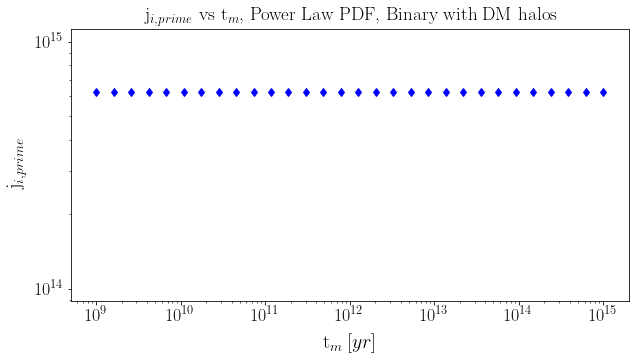

In [42]:
# check of the j_i values using fitting and Interpolation function. 

def ji_prime(m_1, m_2, Δ_1, Δ_2, X, tm):
    beta = 0.75
    gamma  =  0.65
    delta = -0.89
    a_i_ref =  file['arr_2']   # in units of pc
    m1_ref = 1      # in units of solar mass.
    m2_ref = 1e-3   # in units of solar mass.

    def f_(m):
        return f*P(m)

    def f_b(m_1,m_2):
        return  f_(m_1)+f_(m_2)

    def λ(m_1, m_2, Δ_1, Δ_2, X): # λ_0
        return  X/(f_b(m_1,m_2)*np.sqrt(Δ_1*Δ_2))

    def PDF(m):
        return (P(m)/m)


    I = quad(PDF, m_min, m_max)             # Taking limits of the PBH mass from m_min M☉ to m_max M☉ instead of 
                                         # 0 to infinity.

    n_T = f * ρ_eq * I[0]                #n_T=f*ρ_eq∫(P(m)/m)*dm 

    def x̄(m_1,m_2,Δ_1,Δ_2):
        return (((3 * (m_1 + m_2))/(8 * π * ρ_eq * f_b(m_1,m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))


    def a_initial(m_1, m_2, Δ_1, Δ_2, X):  # for x = x_bar 
        return (0.0977*λ(m_1,m_2,Δ_1,Δ_2, X) + 0.0057*(λ(m_1,m_2,Δ_1,Δ_2, X)**2)) * x̄(m_1,m_2,Δ_1,Δ_2) * (X**(1/3))


    def C(m_1,m_2,Δ_1,Δ_2, X):
        return ((a_initial(m_1,m_2,Δ_1,Δ_2, X)/a_i_ref)**(beta)) * ((m_1/ m1_ref)**(gamma)) * ((m_2/m2_ref)**(delta))


    if tm_ref_list[0] < t_m/C(m_1,m_2,Δ_1,Δ_2, X) < tm_ref_list[-1]:

        g =  InterpolatedUnivariateSpline(tm_ref_list, ji_ref_list, ext = 2, k= 2) # j_i = g(t_m)
        g_prime = g.derivative()
        j_i = g(t_m/C)
        j_i_prime = (1/C) * g_prime(t_m/C) 

    else: #2 
        m = file['arr_0']
        b = file['arr_1']
        j_i = (10**(-b/m))   * (tm**(1/m))
        j_i_prime = (1/m) * ((1/C(m_1,m_2,Δ_1,Δ_2, X))**(1/m)) * (10**(-b/m)) * (t_m**(-(m-1)/m))

    return  j_i_prime



    
    
tm_list = (np.geomspace(1e9, 1e15, 30)).tolist()
ji_prime_list = np.zeros(len(tm_list))



for i, tm in enumerate(tm_list):
    f_pbh = 7.94e-4
    f = 0.85 * f_pbh
    def P(m): #Powerlaw PBH mass distribution
        α = 1.6
        M = 5     #in units of M☉, for PBHs mass range of m_min = 5 M☉ - m_min = 100 M☉ .
        return ((α-1)/M) * ((m/M)**(-α))

    ji_prime_list[i] = ji_prime(m_1,m_2,Δ_1,Δ_2, X, tm)
    

    
    
    
plt.figure(figsize = (10, 5))
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.loglog(tm_list, ji_prime_list, 'bd' )

#plt.text(1e12, 1e-10, "$m_{i} = 87 \: \mathrm{M_{\odot}}$", size = 20)
#plt.text(1e12, 1e-13, "$m_{j} = 7 \: \mathrm{M_{\odot}}$", size = 20)
#plt.text(1e12, 1e-16, "$X = 10^{-10} $", size = 20)


#plt.legend([ "Fitting function"], loc = 'upper left', fontsize = 20)
plt.xlabel('t$_{m}$$\: [yr]$', fontsize = 20, labelpad = 9)
plt.ylabel('j$_{i, prime}$', fontsize = 20, labelpad = 9)
plt.title('j$_{i, prime}$ vs t$_{m}$, Power Law PDF, Binary with DM halos', fontsize = 19, pad = 9)
plt.show()